In [1]:
## Lydia Lee

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from pprint import pprint

In [2]:
hbar = 1e-27 # erg.s, Planck's constant
h_Planck = hbar * 2*np.pi # erg.s, Planck's constant
c = 3e10 # cm/s, speed of light
m_p = 1.6e-24 # g, proton mass
a0 = 0.5e-8 # cm, Bohr radius
kB = 1.4e-16 # erg/K, Boltzmann constant
q = 5e-10 # esu, electron charge
lamda_LyA = 121.6e-7 # cm, wavelength of LyA
nu_LyA = c/lamda_LyA # Hz, frequency of LyA
A_LyA = 5e8 # 1/s, Einstein A of LyA
d_CO = .122e-18 # esu.cm, dipole moment of carbon monoxide
d_H = q*a0 # esu.cm, dipole moment of hydrogen
nu0_CO = 4.2e-13/h_Planck # Hz, value given in class

x0 = 2.4*a0
m_C = 12*m_p
m_O = 16*m_p
q_mult = 3
parallel = lambda lst: (sum([1/x for x in lst]))**-1 if 0 not in lst else 0

In [3]:
k_center = 2145 # cycles/cm, center wavenumber
nu_center = k_center*c # Hz

In [4]:
def omega0_diatom(m1=m_C, m2=m_O, x=x0, q_mult=q_mult) -> float:
    '''
    Inputs:
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x: Float, cm. Internuclear distance between the atoms.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. The natural frequency of a diatomic molecule, in rad/s.
    '''
    return nu_center * 2*np.pi # pumpkin-eating in the spirit of October
#     k_spring = (q*q_mult)**2 / x**3 # spring constant
#     mu = parallel([m1, m2]) # reduced mass
#     return np.sqrt(k_spring/mu)

def E_vib_diatom(n, m1=m_C, m2=m_O, x0=x0, q_mult=q_mult) -> float:
    '''
    Inputs:
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. The energy of a diatom's nth vibrational state, in ergs.
    '''
    omega0 = omega0_diatom(m1, m2, x0, q_mult) # TODO second-order effects don't end up mattering
#     k_spring = (q*q_mult)**2 / x0**3 # spring constant
#     De = 0.5 * k_spring * x0**2
    return hbar*omega0*(n+0.5) # - (hbar*omega0*(n+0.5))**2/(4*De)

def I_diatom(J, n, m1=m_C, m2=m_O, x0=x0, q_mult=q_mult) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation n=0.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. The moment of inertia of a diatom in g.cm^2.
    '''  
#     E_vib = E_vib_diatom(n, m1, m2, x0, q_mult)
#     k_spring = (E_vib/hbar)**2 * parallel([m1, m2])
#     k_spring = (q*q_mult)**2/x0**3
#     De = 1/2 * k_spring * x0**2
#     a = np.sqrt(k_spring/(2*De))

    x = x0 # TODO adjust internuclear separation
#     x = x0 - 1/a * np.log(1-np.sqrt(E_vib/De))
#     x = x0 + np.sqrt(2/k_spring * E_vib)
    return parallel([m1, m2]) * x**2

def E_rot_diatom(J, n, m1=m_C, m2=m_O, x0=x0) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
    Returns:
        Float. The energy of a diatom's rotational state with quantum
        numbers J and n in ergs.
    '''
    return hbar**2/(2*I_diatom(J,n,m1,m2,x0)) * J * (J+1)

def E_rovib_diatom(J, n, m1=m_C, m2=m_O, x0=x0, q_mult=q_mult) -> float:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
        n: Integer. Vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. The energy of the state with vibrational quantum number n
        and rotational quantum number J, in ergs.
    '''
    E_vib = E_vib_diatom(n, m1, m2, x0, q_mult)
    E_rot = E_rot_diatom(J, n, m1, m2, x0)
    return E_vib + E_rot

def g_degen(J) -> int:
    '''
    Inputs:
        J: Integer. Rotational quantum number.
    Returns:
        Integer. Degeneracy of the state associated with rotational quantum
        number J.
    '''
    return 2*J + 1

def population_rel(J, n, T, m1=m_C, m2=m_O, x0=x0) -> float:
    '''
    Inputs:
    Returns:
        Float. The ratio of populations n_{J+1}/n_J assuming Boltzmann statistics.
    '''
    dE_rot = E_rot_diatom(J+1, n , m1, m2, x0) - E_rot_diatom(J, n , m1, m2, x0)
    return g_degen(J+1)/g_degen(J) * np.exp(-dE_rot/(kB*T))

def omega_rovib(Ji, Jf, delta_n=1, m1=m_C, m2=m_O, x0=x0, q_mult=q_mult) -> float:
    '''
    Inputs:
        Ji: Integer. Initial rotational quantum number.
        Jf: Integer. Final rotational quantum number.
        delta_n: Integer. Change in vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. Frequency (in rad/s) of the photon associated with a 
        transition with delta_n=delta_n and delta_J=Jf-Ji.
    '''
    E = E_rovib_diatom(Jf, delta_n, m1, m2, x0, q_mult) - \
        E_rovib_diatom(Ji, 0, m1, m2, x0, q_mult)
    return E/hbar

def A_dip(Ji, Jf, delta_n=1, m1=m_C, m2=m_O, x0=x0, d=d_CO, q_mult=q_mult) -> float:
    '''
    Inputs:
        Ji: Integer. Initial rotational quantum number.
        Jf: Integer. Final rotational quantum number.
        delta_n: Integer. Change in vibrational quantum number.
        m1: Float, g. Mass of one of the atoms in the diatom. 
        m2: Float, g. Mass of the other atom in the diatom.
        x0: Float, cm. Atomic separation at n=0.
        d: Float, esu*cm. Dipole moment.
        q_mult: Float. The multiplier for the electron charge 
            used to calculate the coulomb force between the atoms.
    Returns:
        Float. The Einstein A coefficient of the transition for a dipole.
    '''
    omega = omega_rovib(Ji, Jf, delta_n, m1, m2, x0, q_mult)
    nu = omega/(2*np.pi)
    A = A_LyA * (d/d_H)**2 * (nu/nu_LyA)**3
    return A

<h1>1</h1>

In [5]:
k_center = 2145 # cycles/cm, center wavenumber

nu_center = k_center*c # Hz
# nu0 = omega0_diatom(x=x0, q_mult=q_mult)/(2*np.pi)
Delta_n = nu_center/nu0_CO

print(f'Delta n (Computed):\t{Delta_n}')
print("nu_center:\t\t{:.2e} Hz".format(nu_center))
print(f'n:\t\t\t{int(round(Delta_n))} -> 0')

Delta n (Computed):	0.9626737488500153
nu_center:		6.44e+13 Hz
n:			1 -> 0


<h1>2</h1>

In [6]:
num_J = 20
J_vec = np.array(range(num_J))
T_vec = np.arange(1, 1000, 1)
# plt.rcParams['figure.figsize'] = (16, 8)

# Keeping track of the temperature at which the ratio n_{J+1}/n_J exceeds 1
T_cross1_J = [np.inf]*len(J_vec)
ratio_nJ_dict = dict()

for i,J in enumerate(J_vec):
    ratio_nJ_dict[J] = population_rel(J, 0, T_vec)

    idx_cross1_J = np.argwhere(np.diff(np.sign(ratio_nJ_dict[J]-1))).flatten()
    assert len(idx_cross1_J) < 2, f'J={J}: ratio does not monotonically increase with temperature'
    if len(idx_cross1_J) == 1:
        T_cross1_J[i] = T_vec[idx_cross1_J[0]]

Temperature Range: [288, 365) K


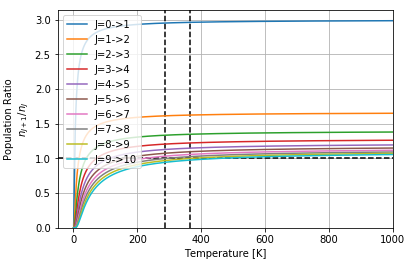

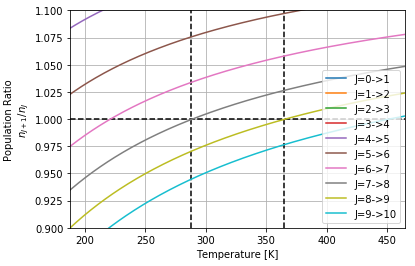

In [7]:
J_infl = 7 # value of J where n_J/n_{J-1} > 1 and n_{J+1}/n_J < 1
J_vec_shortened = np.arange(0, 10)

# Plotting
for J in J_vec_shortened:
    plt.plot(T_vec, ratio_nJ_dict[J], label=f'J={J}->{J+1}')
plt.legend()
plt.grid(True)
plt.xlabel('Temperature [K]')
plt.ylabel('Population Ratio\n$n_{J+1}/n_J$')
plt.xlim(*plt.xlim())
plt.xlim(right=max(T_vec))
plt.ylim(0)

# Annotations
plt.hlines(1, *plt.xlim(), linestyles='dashed')
T_min = T_cross1_J[J_infl]
T_max = T_cross1_J[J_infl+1]
plt.vlines(T_min, *plt.ylim(), linestyles='dashed')
plt.vlines(T_max, *plt.ylim(), linestyles='dashed')
print(f'Temperature Range: [{T_min}, {T_max}) K')

# For visibility
plt.figure()
for J in J_vec_shortened:
    plt.plot(T_vec, ratio_nJ_dict[J], label=f'J={J}->{J+1}')
plt.legend()
plt.grid(True)
plt.xlabel('Temperature [K]');
plt.ylabel('Population Ratio\n$n_{J+1}/n_J$');
plt.xlim(T_min-100, T_max+100);
plt.ylim(0.9, 1.1);

# Annotations
plt.hlines(1, *plt.xlim(), linestyles='dashed');
plt.vlines(T_min, *plt.ylim(), linestyles='dashed');
plt.vlines(T_max, *plt.ylim(), linestyles='dashed');

<h1>3</h1>

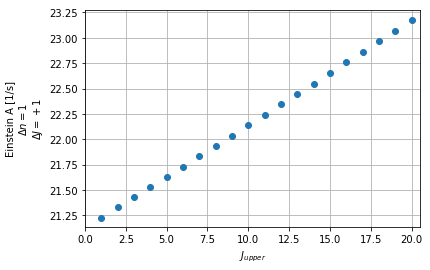

In [8]:
A_vec_incr = [0] * len(J_vec)
for i, J in enumerate(J_vec):
    A_vec_incr[i] = A_dip(Ji=J, Jf=J+1)
plt.plot(J_vec+1, A_vec_incr, 'o')
plt.xlabel('$J_{upper}$')
plt.ylabel('Einstein A [1/s]\n$\Delta n=1$\n$\Delta J=+1$')
plt.grid()
plt.xlim(0, num_J+0.5);
# plt.xticks(range(num_J+1));

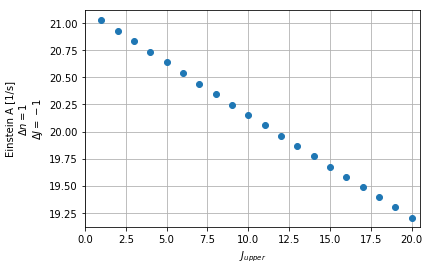

In [9]:
A_vec_decr = [0] * len(J_vec)
for i, J in enumerate(J_vec):
    A_vec_decr[i] = A_dip(Ji=J+1, Jf=J)
plt.plot(J_vec+1, A_vec_decr, 'o')
plt.xlabel('$J_{upper}$')
plt.ylabel('Einstein A [1/s]\n$\Delta n=1$\n$\Delta J=-1$')
plt.grid()
plt.xlim(0, num_J+0.5);
# plt.xticks(range(num_J+1));

<h1>4</h1>

In [10]:
T_mid = T_min
idx_T = np.argwhere(np.diff(np.sign(T_vec-T_mid))).flatten()[0]
nu_vec_incr = omega_rovib(Ji=J_vec, Jf=J_vec+1)/(2*np.pi)
nu_vec_decr = omega_rovib(Ji=J_vec+1, Jf=J_vec)/(2*np.pi)

k_vec_incr = nu_vec_incr/c
k_vec_decr = nu_vec_decr/c

# Population normalizing with respect to the population @ J=0
pop_vec = [1] + [0]*len(J_vec)

for i, J in enumerate(J_vec):
    pop_vec[i+1] = pop_vec[i] * ratio_nJ_dict[J][idx_T]

pop_upper_vec = pop_vec[1:]
    
# Calculating emission coefficient, assuming the line profile function is constant
j_nu_vec_incr = h_Planck*nu_vec_incr/(4*np.pi) * np.array(A_vec_incr) * pop_upper_vec
j_nu_vec_decr = h_Planck*nu_vec_decr/(4*np.pi) * np.array(A_vec_decr) * pop_upper_vec

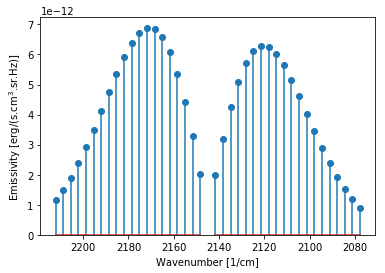

In [11]:
plt.stem(k_vec_incr, j_nu_vec_incr)
plt.stem(k_vec_decr, j_nu_vec_decr)
xmin, xmax = plt.xlim();
plt.xlim(xmax, xmin)
plt.ylim(0)
plt.xlabel('Wavenumber [1/cm]');
plt.ylabel('Emissivity [erg/(s.cm$^3$.sr.Hz)]');

<h1>Sanity Check</h1>

In [19]:
E_rovib_diatom(J=1, n=1)
E_rot_diatom(J=1, n=1)
# E_vib_diatom(n=1)
# I_diatom(J=1, n=1)
# parallel([m_C, m_O])

6.329571759259259e-16